In [1]:
import xml.etree.ElementTree as ET 
import numpy as np
import matplotlib.pyplot as plt

import errors
import extract_observables
from plotting_envir import Plotter

In [2]:
data_path = "/home/lqcd/brian137/chroma_Wloops/gpu_test/wflow_to_1.5/data/"
smoothing = [0, 0.5, 1, 1.5]

# Check how errors scale with the number of data points (bootstrap)

In [3]:
data = extract_observables.Data_Processing(data_path, start_time = [5,5,5,5])
data.file1 = 3500
data.off_axis = True
data.read_all_files()

halfdata = extract_observables.Data_Processing(data_path, start_time = [5,5,5,5])
halfdata.file1 = 2350
halfdata.off_axis = True
halfdata.read_all_files()


In [4]:
err0 = data.find_potential_errors()
err1 = halfdata.find_potential_errors()

In [5]:
print(err0.shape)

(4, 2, 70)


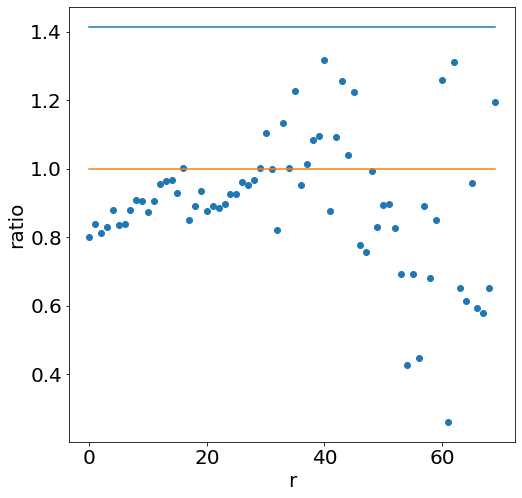

In [6]:
which_smoothing = 1
x = len(err1[which_smoothing][1])
plotter = Plotter("", "r", "ratio"); ax = plotter.ax
ax.scatter(range(x), err1[which_smoothing][1]/err0[which_smoothing][1])
ax.plot(range(x), np.ones(x)*np.sqrt(2))
ax.plot(range(x), np.ones(x))


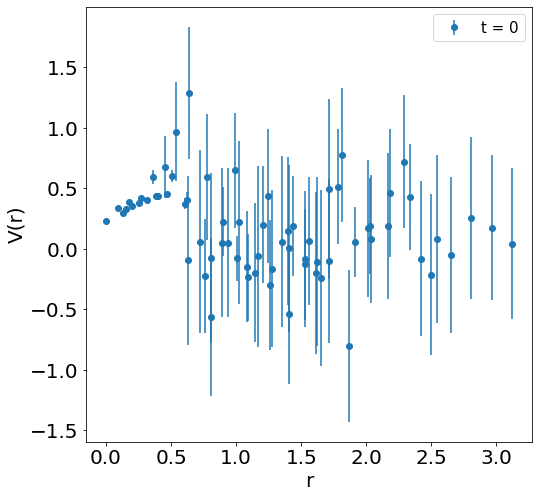

In [8]:
plotter = Plotter("", "r", "V(r)"); ax = plotter.ax
for i in range(0, 1):
    ax.errorbar(data.r*0.09, err0[i][0], yerr = err0[i][1], fmt = 'o', label = f"t = {smoothing[i]}")
plotter.show_legend()

# Test Jackknife

In [10]:
bootstrap_data = extract_observables.Data_Processing(data_path, start_time = [5,5,5,5])
bootstrap_data.file1 = 3500
bootstrap_data.off_axis = True
bootstrap_data.read_all_files()

In [50]:
jackknife_data = extract_observables.jackknife_Data_Processing(data_path, start_time = [5,5,5,5])
jackknife_data.file1 = 3500
jackknife_data.off_axis = True
jackknife_data.read_all_files()

In [51]:
bs_data = bootstrap_data.find_potential_errors()
jk_mean, jk_error = jackknife_data.find_potential_errors()

In [52]:
jk_mean.shape

(4, 70)

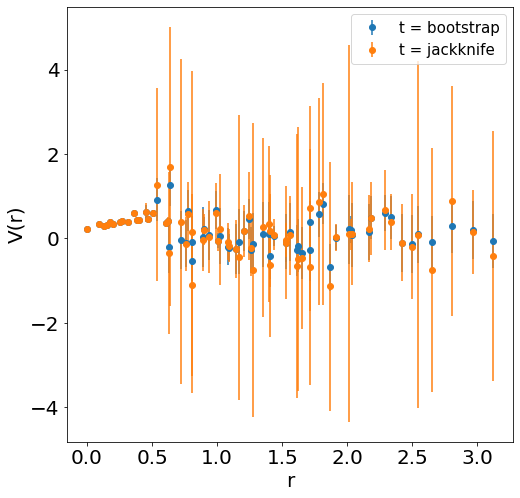

In [53]:
plotter = Plotter("", "r", "V(r)"); ax = plotter.ax
i = 0
ax.errorbar(bootstrap_data.r*0.09, bs_data[i][0], yerr = bs_data[i][1], fmt = 'o', label = f"t = bootstrap")
ax.errorbar(jackknife_data.r*0.09, jk_mean[i], yerr = jk_error[i], fmt = 'o', label = f"t = jackknife")

plotter.show_legend()

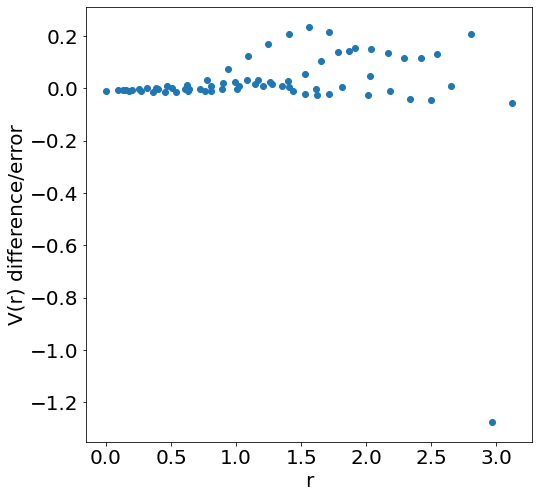

In [56]:
plotter = Plotter("", "r", "V(r) difference/error"); ax = plotter.ax
i = 3
ax.scatter(bootstrap_data.r*0.09, (bs_data[i][0] - jk_mean[i])/bs_data[i][1])


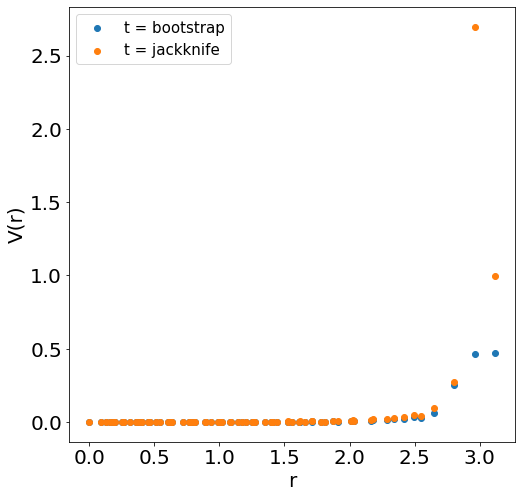

In [55]:
plotter = Plotter("", "r", "V(r)"); ax = plotter.ax
i = 3
ax.scatter(bootstrap_data.r*0.09, bs_data[i][1], label = f"t = bootstrap")
ax.scatter(jackknife_data.r*0.09, jk_error[i], label = f"t = jackknife")
plotter.show_legend()